In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor


df = pd.read_csv('Data/laptop_prices.csv')

df


,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [2]:
print(df.isnull().sum())

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64


In [3]:
duplicate_df = df[df.duplicated()]
print("Number of duplicate rows", duplicate_df.shape)



Number of duplicate rows (0, 11)


In [4]:
df = df.drop_duplicates()
df


,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [5]:
from sklearn.preprocessing import LabelEncoder

le_Brand = LabelEncoder()
le_Processor = LabelEncoder()
le_RAM = LabelEncoder()
le_Storage = LabelEncoder()
le_GPU = LabelEncoder()
le_OS = LabelEncoder()
le_Resolution = LabelEncoder()

df['Brand_en'] = le_Brand.fit_transform(df['Brand'])
df['Processor_en'] = le_Processor.fit_transform(df['Processor'])
df['RAM_en'] = le_RAM.fit_transform(df['RAM (GB)'])
df['Storage_en'] = le_Storage.fit_transform(df['Storage'])
df['GPU_en'] = le_GPU.fit_transform(df['GPU'])
df['OS_en'] = le_OS.fit_transform(df['Operating System'])
df['Resolution_en'] = le_Resolution.fit_transform(df['Resolution'])

print(dict(enumerate(le_Brand.classes_)))
print(dict(enumerate(le_Processor.classes_)))
print(dict(enumerate(le_RAM.classes_)))
print(dict(enumerate(le_Storage.classes_)))
print(dict(enumerate(le_GPU.classes_)))
print(dict(enumerate(le_OS.classes_)))
print(dict(enumerate(le_Resolution.classes_)))


{0: 'Acer', 1: 'Apple', 2: 'Asus', 3: 'Dell', 4: 'HP', 5: 'Lenovo', 6: 'MSI', 7: 'Microsoft', 8: 'Razer', 9: 'Samsung'}
{0: 'AMD Ryzen 3', 1: 'AMD Ryzen 5', 2: 'AMD Ryzen 7', 3: 'AMD Ryzen 9', 4: 'Intel i3', 5: 'Intel i5', 6: 'Intel i7', 7: 'Intel i9'}
{0: np.int64(4), 1: np.int64(8), 2: np.int64(16), 3: np.int64(32), 4: np.int64(64)}
{0: '1TB HDD', 1: '1TB SSD', 2: '256GB SSD', 3: '2TB SSD', 4: '512GB SSD'}
{0: 'AMD Radeon RX 6600', 1: 'AMD Radeon RX 6800', 2: 'Integrated', 3: 'Nvidia GTX 1650', 4: 'Nvidia RTX 2060', 5: 'Nvidia RTX 3060', 6: 'Nvidia RTX 3080'}
{0: 'FreeDOS', 1: 'Linux', 2: 'Windows', 3: 'macOS'}
{0: '1366x768', 1: '1920x1080', 2: '2560x1440', 3: '3840x2160'}


In [6]:
import re

def convert_to_gb(value):
    if "TB" in value:
        return int(re.search(r'\d+', value).group()) * 1024
    elif "GB" in value:
        return int(re.search(r'\d+', value).group())
    return 0

# สร้างคอลัมน์ใหม่
df["HDD (GB)"] = df["Storage"].apply(lambda x: convert_to_gb(x) if "HDD" in x else 0)
df["SSD (GB)"] = df["Storage"].apply(lambda x: convert_to_gb(x) if "SSD" in x else 0)

In [7]:
df = df.drop(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU', 'Operating System', 'Resolution', 'Storage_en'], axis=1)

df

,Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_en,Processor_en,RAM_en,GPU_en,OS_en,Resolution_en,HDD (GB),SSD (GB)
0,17.3,8.9,1.42,3997.07,1,0,4,3,0,2,0,512
1,14.0,9.4,2.57,1355.78,8,2,0,6,1,0,0,1024
2,13.3,8.5,1.74,2673.07,2,5,3,5,0,3,0,2048
3,13.3,10.5,3.10,751.17,5,5,0,6,2,0,0,256
4,16.0,5.7,3.38,2059.83,8,4,0,0,1,3,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
11763,17.3,11.5,1.58,704.82,0,4,0,4,3,0,0,2048
11764,16.0,9.5,2.14,775.59,2,4,0,1,1,0,0,2048
11765,15.6,8.2,2.05,2789.46,8,3,0,0,1,2,0,2048
11766,13.3,7.5,1.48,1067.13,9,2,2,2,3,1,0,512


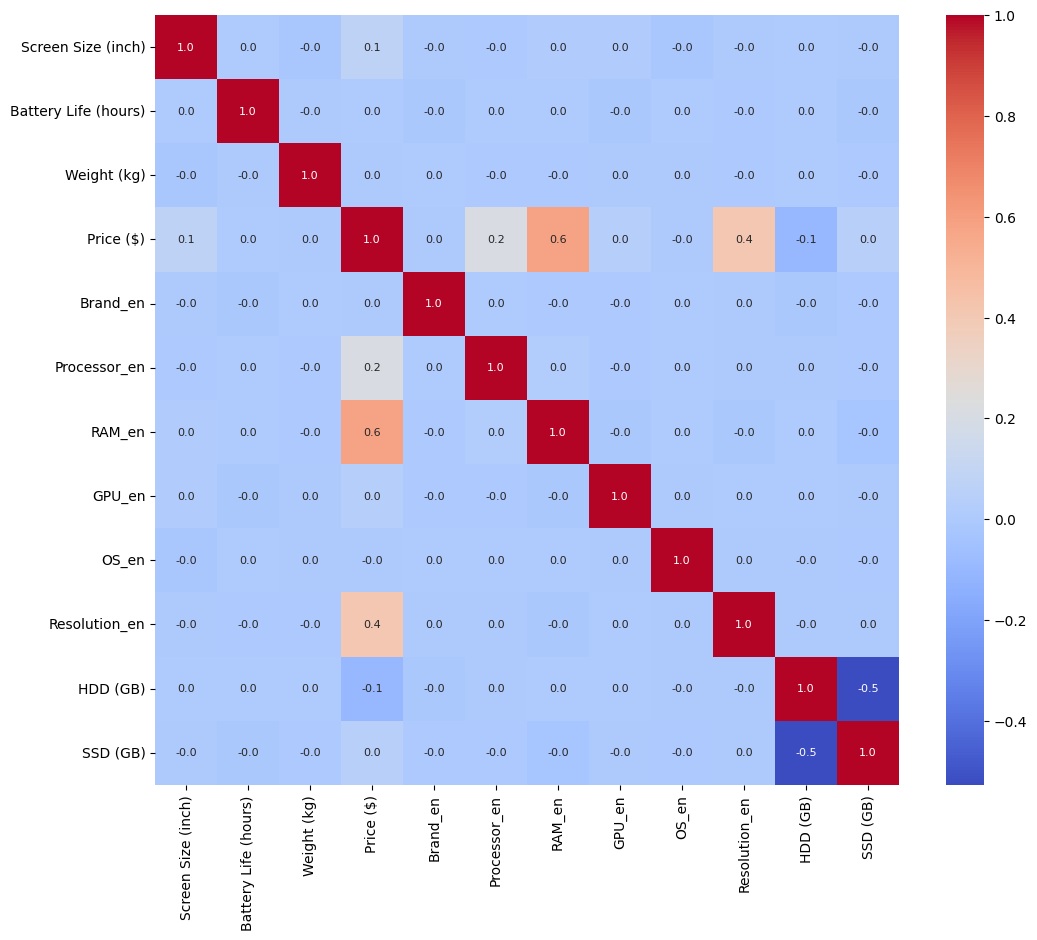

In [8]:
df# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f", annot_kws={"size": 8})
plt.show()

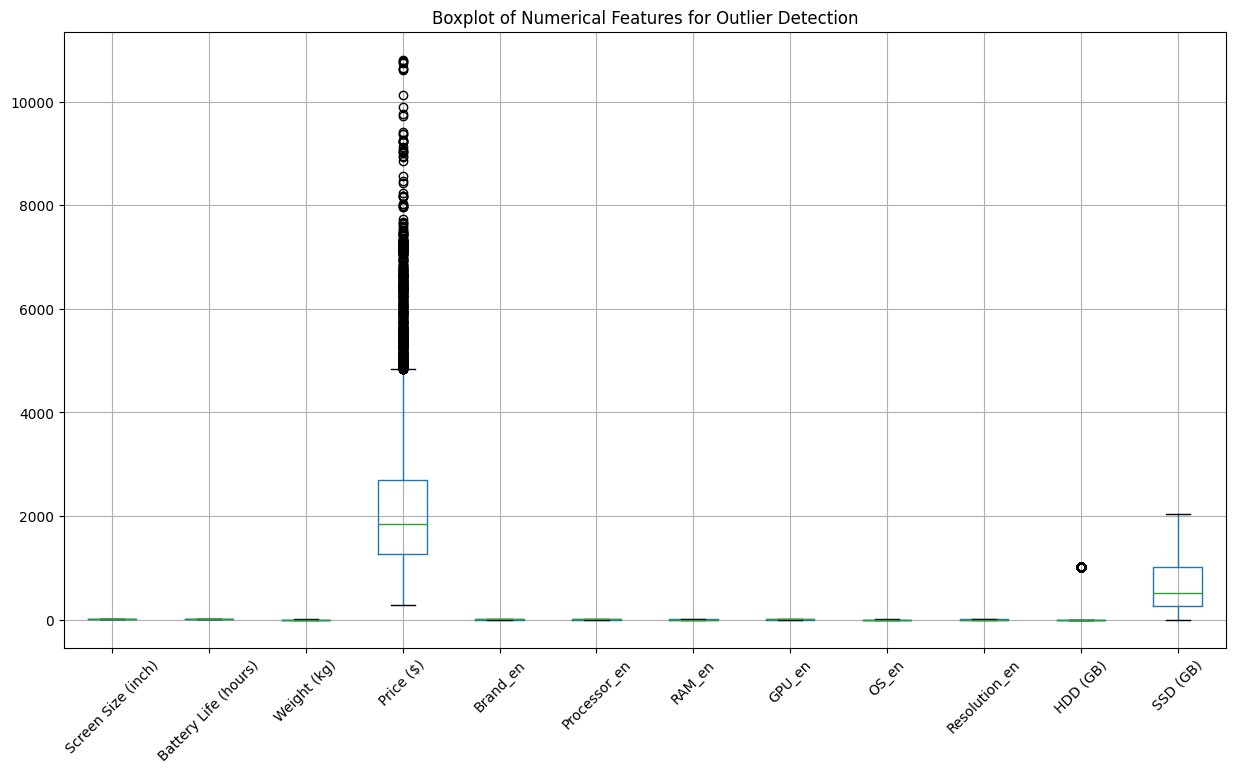

In [9]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=45)
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

In [10]:
import numpy as np
import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# 🔹 ลบ Outliers เฉพาะคอลัมน์ Price ($)
df_cleaned = remove_outliers_iqr(df, 'Price ($)')

# 🔹 แสดงจำนวนแถวก่อนและหลังการลบ Outliers
original_size = df.shape[0]
cleaned_size = df_cleaned.shape[0]

original_size, cleaned_size


(11768, 11163)

In [11]:
'''import numpy as np
import pandas as pd

def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns  # เลือกเฉพาะคอลัมน์ตัวเลข
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

original_size = df.shape[0]
cleaned_size = df_cleaned.shape[0]

original_size, cleaned_size
'''

'import numpy as np\nimport pandas as pd\n\ndef remove_outliers_iqr(df):\n    numeric_columns = df.select_dtypes(include=[np.number]).columns  # เลือกเฉพาะคอลัมน์ตัวเลข\n    Q1 = df[numeric_columns].quantile(0.25)\n    Q3 = df[numeric_columns].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]\n\n    return df_cleaned\n\ndf_cleaned = remove_outliers_iqr(df)\n\noriginal_size = df.shape[0]\ncleaned_size = df_cleaned.shape[0]\n\noriginal_size, cleaned_size\n'

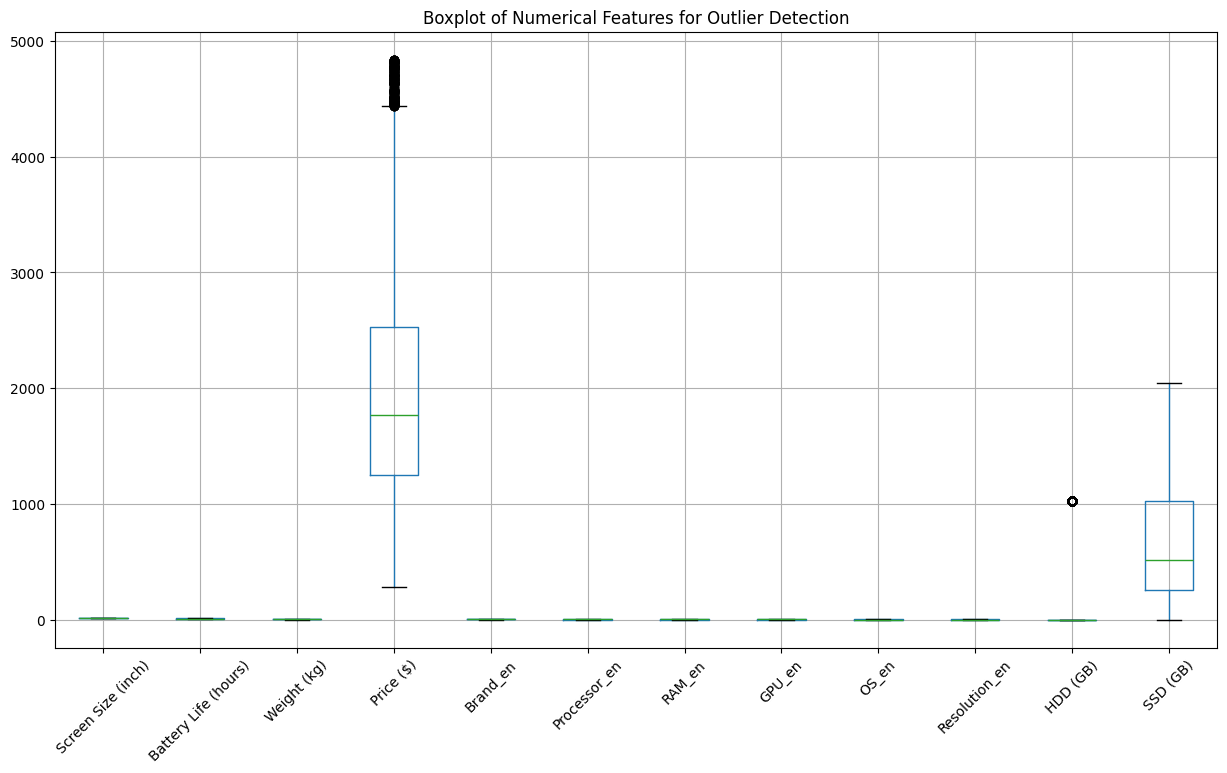

In [12]:
plt.figure(figsize=(15, 8))
df_cleaned.boxplot(rot=45)
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

In [13]:
duplicate_df = df[df.duplicated()]
print("Number of duplicate rows", duplicate_df.shape)

Number of duplicate rows (0, 12)


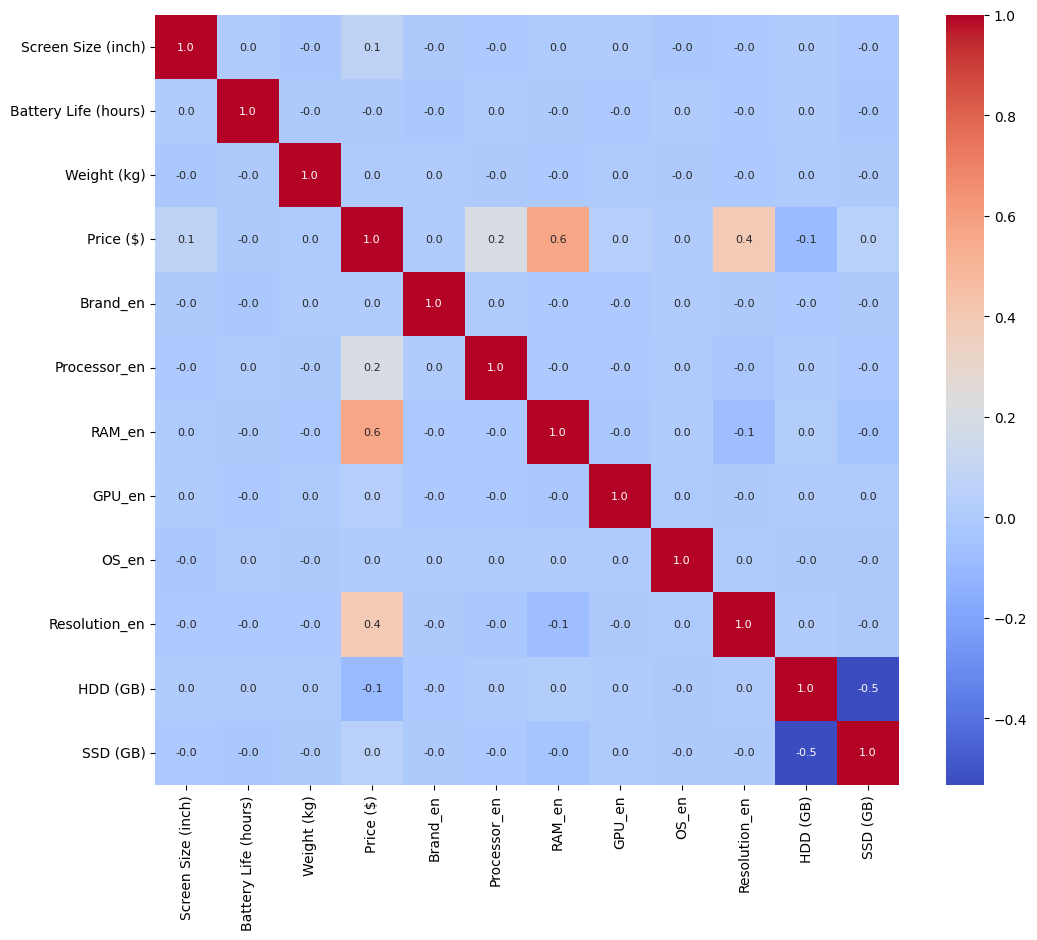

In [14]:
# Correlation matrix
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f", annot_kws={"size": 8})
plt.show()

In [15]:
'''from pandas.plotting import scatter_matrix
clean_data = df_cleaned.apply(pd.to_numeric, errors='coerce')
scatter_matrix(clean_data, figsize=(20, 25), alpha=0.8, diagonal='hist')
plt.show()'''

"from pandas.plotting import scatter_matrix\nclean_data = df_cleaned.apply(pd.to_numeric, errors='coerce')\nscatter_matrix(clean_data, figsize=(20, 25), alpha=0.8, diagonal='hist')\nplt.show()"

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()
scaler_all = StandardScaler()

x1 = df_cleaned['RAM_en']
x2 = df_cleaned['Resolution_en']
x3 = df_cleaned['Processor_en']
x4 = df_cleaned['Battery Life (hours)']
X = np.column_stack((x1, x2, x3, x4))
y = df_cleaned['Price ($)']
X_all = scaler_all.fit_transform(df)
X_all_df = pd.DataFrame(X_all, columns=df.columns)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


In [17]:
df

,Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_en,Processor_en,RAM_en,GPU_en,OS_en,Resolution_en,HDD (GB),SSD (GB)
0,17.3,8.9,1.42,3997.07,1,0,4,3,0,2,0,512
1,14.0,9.4,2.57,1355.78,8,2,0,6,1,0,0,1024
2,13.3,8.5,1.74,2673.07,2,5,3,5,0,3,0,2048
3,13.3,10.5,3.10,751.17,5,5,0,6,2,0,0,256
4,16.0,5.7,3.38,2059.83,8,4,0,0,1,3,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
11763,17.3,11.5,1.58,704.82,0,4,0,4,3,0,0,2048
11764,16.0,9.5,2.14,775.59,2,4,0,1,1,0,0,2048
11765,15.6,8.2,2.05,2789.46,8,3,0,0,1,2,0,2048
11766,13.3,7.5,1.48,1067.13,9,2,2,2,3,1,0,512


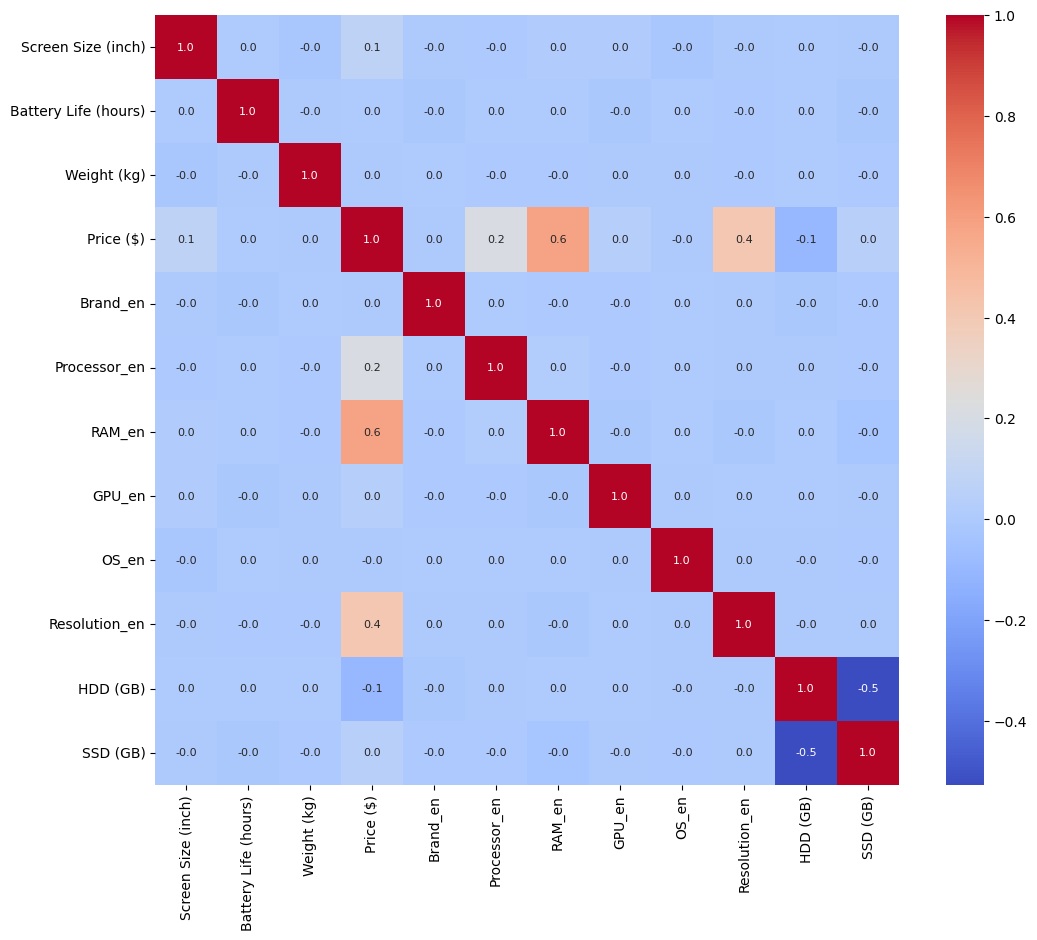

In [18]:
df# Correlation matrix
corr_matrix = X_all_df.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f", annot_kws={"size": 8})
plt.show()

In [19]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (11163, 4)
y shape: (11163,)


In [20]:
X

array([[4. , 2. , 0. , 8.9],
       [0. , 0. , 2. , 9.4],
       [3. , 3. , 5. , 8.5],
       ...,
       [0. , 2. , 3. , 8.2],
       [2. , 1. , 2. , 7.5],
       [1. , 2. , 6. , 6.4]], shape=(11163, 4))

In [21]:
'''pip install --upgrade scikit-learn xgboost
'''

'pip install --upgrade scikit-learn xgboost\n'

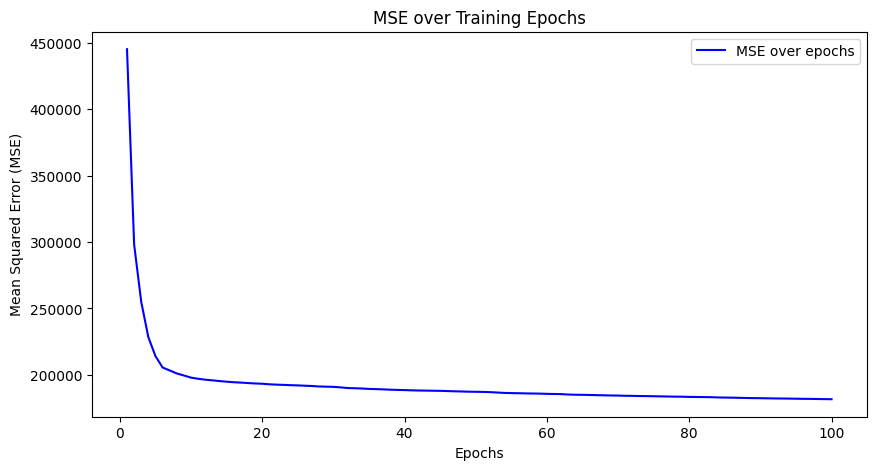

Epoch 1: MAE = 522.3870 - MSE = 445053.0146 - MSEE = 445053.0146 - C = -0.0000
Epoch 2: MAE = 420.4191 - MSE = 298237.6474 - MSEE = 298237.6474 - C = 0.0000
Epoch 3: MAE = 386.5988 - MSE = 254946.5580 - MSEE = 254946.5580 - C = 0.0000
Epoch 4: MAE = 362.9160 - MSE = 228300.8478 - MSEE = 228300.8478 - C = -0.0000
Epoch 5: MAE = 349.2565 - MSE = 214106.6560 - MSEE = 214106.6560 - C = -0.0000
Epoch 6: MAE = 339.3171 - MSE = 205570.4733 - MSEE = 205570.4733 - C = 0.0000
Epoch 7: MAE = 336.1496 - MSE = 203319.6991 - MSEE = 203319.6991 - C = -0.0000
Epoch 8: MAE = 332.9425 - MSE = 201056.6617 - MSEE = 201056.6617 - C = 0.0000
Epoch 9: MAE = 331.0728 - MSE = 199528.8439 - MSEE = 199528.8439 - C = 0.0000
Epoch 10: MAE = 329.7175 - MSE = 197928.1408 - MSEE = 197928.1408 - C = -0.0000
Epoch 11: MAE = 328.5441 - MSE = 197067.5304 - MSEE = 197067.5304 - C = -0.0000
Epoch 12: MAE = 327.6928 - MSE = 196372.9414 - MSEE = 196372.9414 - C = -0.0000
Epoch 13: MAE = 327.2515 - MSE = 195887.6253 - MSEE = 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression

# สร้างตัวเรียนรู้แบบ Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=1, max_depth=3, random_state=42)

# เก็บค่าความสูญเสียในแต่ละรอบ
mae_values = []
mse_values = []
msee_values = []
equations_sse = []
C_values = []
m1_vals = []
m2_vals = []
m3_vals = []
equations = []

# ฝึกโมเดลและบันทึกค่า error และค่าคงที่ C
for epoch in range(1, 101):  # จำนวนรอบที่ฝึก
    gbr.n_estimators = epoch  # ปรับจำนวน estimators ตามรอบ
    gbr.fit(X, y)
    y_pred = gbr.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    msee = np.mean((y - y_pred) ** 2)  # คำนวณ MSEE ใหม่
    C = np.mean(y - y_pred)  # ค่า C = ค่าเฉลี่ยของ residuals
    mse_values.append(mse)
    mae_values.append(mae)
    msee_values.append(msee)
    C_values.append(C)

    coef_approx = np.linalg.lstsq(X[:, :3], y_pred, rcond=None)[0]
    m1, m2, m3 = coef_approx[0], coef_approx[1], coef_approx[2]
    m1_vals.append(m1)
    m2_vals.append(m2)
    m3_vals.append(m3)
    
    if epoch % 1 == 0:
        equations_sse.append(f"Epoch {epoch}: MAE = {mae:.4f} - MSE = {mse:.4f} - MSEE = {msee:.4f} - C = {C:.4f}")
        equations.append(f"     y = {m1:.4f}x1 + {m2:.4f}x2 + {m3:.4f}x3 + {C:.4f}")

# Plot ค่า MSE ในแต่ละ epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse_values) + 1), mse_values, label="MSE over epochs", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Epochs")
plt.legend()
plt.show()

# แสดงค่า C ที่บันทึกไว้ทุก epoch
for eq in equations_sse:
    print(eq)

for eq_sse in mse_values:
    print(eq_sse)

for eq_y in equations:
    print(eq_y)

# ตรวจสอบค่า C โดยตรง
print("C values:", C_values)

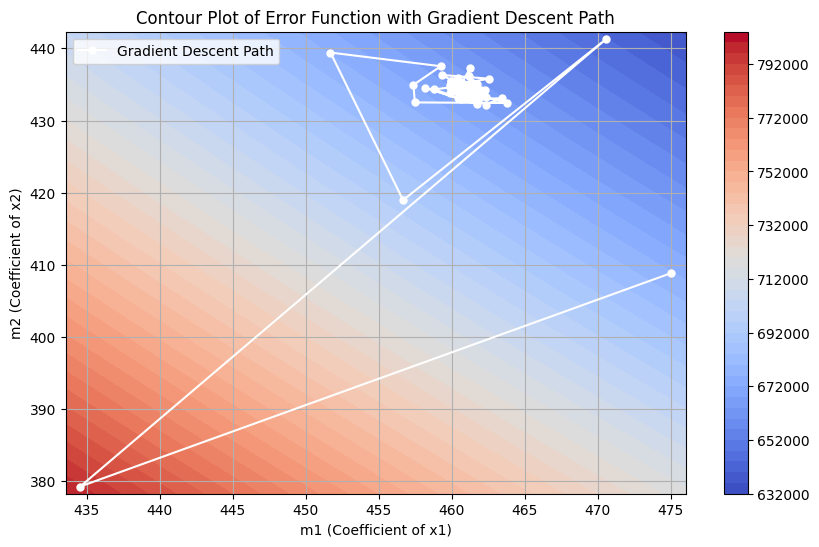

In [27]:
# Contour Plot
m1_range = np.linspace(min(m1_vals) - 1, max(m1_vals) + 1, 50)
m2_range = np.linspace(min(m2_vals) - 1, max(m2_vals) + 1, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)

# คำนวณค่า Error (MSE) สำหรับแต่ละค่าใน Grid
Error = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * X[:, 0] + M2[i, j] * X[:, 1] + np.mean(C_values)
        Error[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of Error Function with Gradient Descent Path")
plt.legend()
plt.grid()
plt.show()

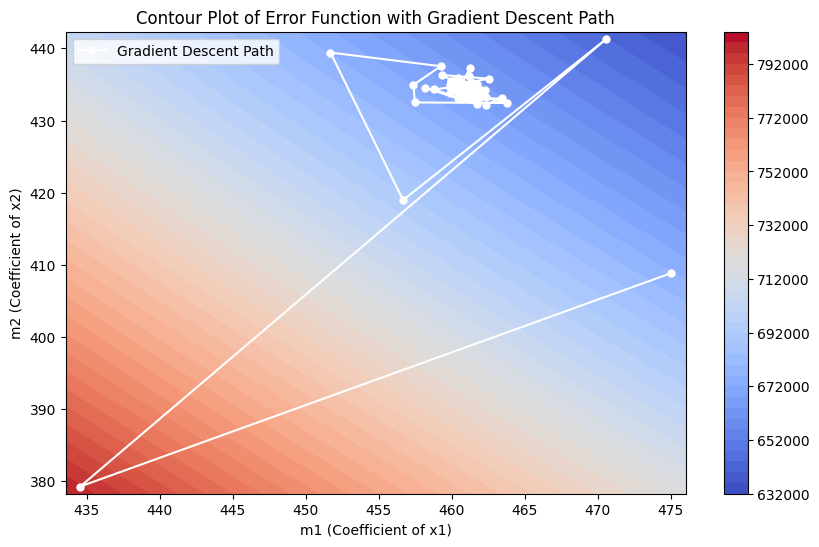

In [28]:
import matplotlib.pyplot as plt

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(min(m1_vals) - 1, max(m1_vals) + 1, 50)
m2_range = np.linspace(min(m2_vals) - 1, max(m2_vals) + 1, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)

# คำนวณค่า Error (MSE) สำหรับแต่ละค่าใน Grid
Error = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M2[i, j] * x2 +  C
        Error[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals = [float(eq_y.split('= ')[1].split('x1')[0]) for eq_y in equations]
m2_vals = [float(eq_y.split('+ ')[1].split('x2')[0]) for eq_y in equations]

plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of Error Function with Gradient Descent Path")
plt.legend()
plt.show()


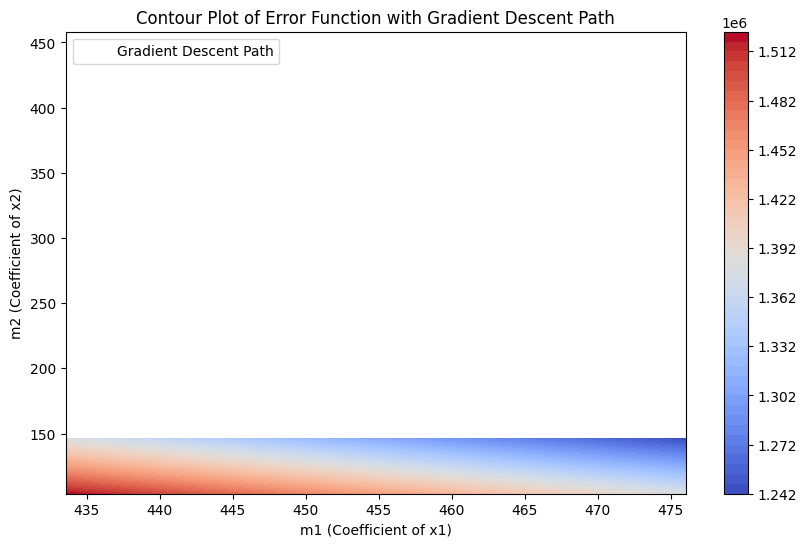

In [25]:
import matplotlib.pyplot as plt

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(min(m1_vals) - 1, max(m1_vals) + 1, 50)
m3_range = np.linspace(min(m3_vals) - 1, max(m3_vals) + 1, 50)
M1, M3 = np.meshgrid(m1_range, m3_range)

# คำนวณค่า Error (MSE) สำหรับแต่ละค่าใน Grid
Error = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M3[i, j] * x2 +  C
        Error[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M3, Error, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals = [float(eq_y.split('= ')[1].split('x1')[0]) for eq_y in equations]
m2_vals = [float(eq_y.split('+ ')[1].split('x2')[0]) for eq_y in equations]

plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of Error Function with Gradient Descent Path")
plt.legend()
plt.show()


In [26]:
import matplotlib.pyplot as plt

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(min(m1_vals) - 1, max(m1_vals) + 1, 50)
m2_range = np.linspace(min(m2_vals) - 1, max(m2_vals) + 1, 50)
m3_range = np.linspace(min(m3_vals) - 1, max(m3_vals) + 1, 50)
M1, M2, M3 = np.meshgrid(m1_range, m2_range, m3_range)

# คำนวณค่า Error (MSE) สำหรับแต่ละค่าใน Grid
Error = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M2[i, j] * x2 + M3[i, j] * x2 +  C
        Error[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals = [float(eq_y.split('= ')[1].split('x1')[0]) for eq_y in equations]
m2_vals = [float(eq_y.split('+ ')[1].split('x2')[0]) for eq_y in equations]

plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of Error Function with Gradient Descent Path")
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (50,) (11163,) 

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# แบ่งชุดข้อมูล 80% เทรน 20% วาlidation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Grid Search สำหรับ XGBoost
xgb_params = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}
xgb_model = XGBRegressor(objective='reg:squarederror')

grid_xgb = GridSearchCV(
    xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)

# 🔹 Grid Search สำหรับ Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
dt_model = DecisionTreeRegressor()

grid_dt = GridSearchCV(
    dt_model, dt_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ Decision Tree
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_val)
mse_dt = mean_squared_error(y_val, y_pred_dt)

# 🔹 แสดงผลการพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(range(len(grid_xgb.cv_results_['mean_test_score'])), -grid_xgb.cv_results_['mean_test_score'], label='XGBoost CV MSE', color='blue')
plt.xlabel("Parameter Set Index")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("XGBoost Cross-Validation MSE")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(len(grid_dt.cv_results_['mean_test_score'])), -grid_dt.cv_results_['mean_test_score'], label='Decision Tree CV MSE', color='red')
plt.xlabel("Parameter Set Index")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Decision Tree Cross-Validation MSE")
plt.legend()
plt.show()

# 🔹 แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best Decision Tree Parameters:", grid_dt.best_params_)
print(f"Final XGBoost MSE: {mse_xgb:.4f}")
print(f"Final Decision Tree MSE: {mse_dt:.4f}")

'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom xgboost import XGBRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.metrics import mean_squared_error\n\n# แบ่งชุดข้อมูล 80% เทรน 20% วาlidation\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# 🔹 Grid Search สำหรับ XGBoost\nxgb_params = {\n    \'n_estimators\': [100, 300, 500, 1000],\n    \'learning_rate\': [0.01, 0.1, 0.2, 0.5],\n    \'max_depth\': [3, 5, 7, 10],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.6, 0.8, 1.0]\n}\nxgb_model = XGBRegressor(objective=\'reg:squarederror\')\n\ngrid_xgb = GridSearchCV(\n    xgb_model, xgb_params, cv=5, scoring=\'neg_mean_squared_error\', verbose=1, n_jobs=-1\n)\n\ngrid_xgb.fit(X_train, y_train)\n\n# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ XGBoost\nbest_xgb = grid_xgb.best_estimator_\ny_pred_xgb = best_xgb.predict(X_val)\nmse_xgb = mean_squared_erro

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# แบ่งชุดข้อมูล 80% เทรน 20% วาlidation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🔹 Grid Search สำหรับ XGBoost
xgb_params = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}
xgb_model = XGBRegressor(objective='reg:squarederror')

grid_xgb = GridSearchCV(
    xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)

# 🔹 Grid Search สำหรับ Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
dt_model = DecisionTreeRegressor()

grid_dt = GridSearchCV(
    dt_model, dt_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ Decision Tree
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_val)
mse_dt = mean_squared_error(y_val, y_pred_dt)

# 🔹 แสดงผลการพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(range(len(grid_xgb.cv_results_['mean_test_score'])), -grid_xgb.cv_results_['mean_test_score'], label='XGBoost CV MSE', color='blue')
plt.xlabel("Parameter Set Index")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("XGBoost Cross-Validation MSE")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(len(grid_dt.cv_results_['mean_test_score'])), -grid_dt.cv_results_['mean_test_score'], label='Decision Tree CV MSE', color='red')
plt.xlabel("Parameter Set Index")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Decision Tree Cross-Validation MSE")
plt.legend()
plt.show()

# 🔹 แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best Decision Tree Parameters:", grid_dt.best_params_)
print(f"Final XGBoost MSE: {mse_xgb:.4f}")
print(f"Final Decision Tree MSE: {mse_dt:.4f}")

'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom xgboost import XGBRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.metrics import mean_squared_error\n\n# แบ่งชุดข้อมูล 80% เทรน 20% วาlidation\nX_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)\n\n# 🔹 Grid Search สำหรับ XGBoost\nxgb_params = {\n    \'n_estimators\': [100, 300, 500, 1000],\n    \'learning_rate\': [0.01, 0.1, 0.2, 0.5],\n    \'max_depth\': [3, 5, 7, 10],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.6, 0.8, 1.0]\n}\nxgb_model = XGBRegressor(objective=\'reg:squarederror\')\n\ngrid_xgb = GridSearchCV(\n    xgb_model, xgb_params, cv=5, scoring=\'neg_mean_squared_error\', verbose=1, n_jobs=-1\n)\n\ngrid_xgb.fit(X_train, y_train)\n\n# ใช้ค่าพารามิเตอร์ที่ดีที่สุดของ XGBoost\nbest_xgb = grid_xgb.best_estimator_\ny_pred_xgb = best_xgb.predict(X_val)\nmse_xgb = mea

In [ ]:
'''# ต้องโหลดไลบรารีใหม่หลังจาก state ถูก reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# ตั้งค่าตัวเรียนรู้แบบ SGD
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=1e-5, warm_start=True)

# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ
m1_vals, m2_vals, m3_vals, mse_values, equations_sse = [], [], [], [], []

# กำหนดค่าเงื่อนไขการหยุด (Early Stopping)
tolerance = 1e-6
max_epochs = 100001

# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์และ error
for epoch in range(max_epochs):  
    sgd.fit(X, y)
    m1, m2, m3 = sgd.coef_
    c = sgd.intercept_[0]

    y_pred = sgd.predict(y)
    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE

    m1_vals.append(m1)
    m2_vals.append(m2)
    m3_vals.append(m3)
    mse_values.append(mse)

    if epoch % 10000 == 0:
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {m3:.4f}x3 + {c:.4f}, MSE = {mse:.4f}")

# Plot ค่า MSE ในแต่ละ epoch
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse_values)), mse_values, label="MSE over epochs", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Epochs")
plt.legend()
plt.show()

# แสดงสมการที่บันทึกไว้ทุก 100 epochs พร้อมค่า MSE
equations_sse
'''

'# ต้องโหลดไลบรารีใหม่หลังจาก state ถูก reset\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import SGDRegressor\n\n# ตั้งค่าตัวเรียนรู้แบบ SGD\nsgd = SGDRegressor(max_iter=1, learning_rate=\'constant\', eta0=1e-5, warm_start=True)\n\n# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ\nm1_vals, m2_vals, m3_vals, mse_values, equations_sse = [], [], [], [], []\n\n# กำหนดค่าเงื่อนไขการหยุด (Early Stopping)\ntolerance = 1e-6\nmax_epochs = 100001\n\n# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์และ error\nfor epoch in range(max_epochs):  \n    sgd.fit(X, y)\n    m1, m2, m3 = sgd.coef_\n    c = sgd.intercept_[0]\n\n    y_pred = sgd.predict(y)\n    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE\n\n    m1_vals.append(m1)\n    m2_vals.append(m2)\n    m3_vals.append(m3)\n    mse_values.append(mse)\n\n    if epoch % 10000 == 0:\n        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {m3:.4f}x3 + {c:.4f}, MSE = {mse:.4f}")\n\n# Plot ค่

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# สร้างตัวเรียนรู้แบบ Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=1, max_depth=3, random_state=42)

# เก็บค่าความสูญเสียในแต่ละรอบ
mae_values = []
mse_values = []
msee_values = []
equations_sse = []

# ฝึกโมเดลและบันทึกค่า error
for epoch in range(1, 1001):  # จำนวนรอบที่ฝึก
    gbr.n_estimators = epoch  # ปรับจำนวน estimators ตามรอบ
    gbr.fit(X, y)
    y_pred = gbr.predict(X)
    
    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE
    mae = mean_absolute_error(y_test, y_pred)
    msee = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mae_values.append(mae)
    msee_values.append(msee)
    
    if epoch % 10 == 0:
        equations_sse.append(f"Epoch {epoch}: MAE = {mae:.4f} - MSE = {mse:.4f} - MSEE = {mse:.4f}")

# Plot ค่า MSE ในแต่ละ epoch
plt.figure(figsize=(100, 5))
plt.plot(range(1, len(mse_values) + 1), mse_values, label="MSE over epochs", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Epochs")
plt.legend()
plt.show()

# แสดงค่า MSE ที่บันทึกไว้ทุก 10 epochs
equations_sse


NameError: name 'X' is not defined

In [ ]:
'''# สร้างตารางค่าพารามิเตอร์เพื่อทำ Contour Plot
m1_range = np.linspace(min(m1_vals) - 0.5, max(m1_vals) + 0.5, 50)
m2_range = np.linspace(min(m2_vals) - 0.5, max(m2_vals) + 0.5, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)
MSE_grid = np.zeros_like(M1)

for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * X[:, 0] + M2[i, j] * X[:, 1] + c
        MSE_grid[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
plt.contourf(M1, M2, MSE_grid, levels=50, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="MSE")
plt.plot(m1_vals, m2_vals, marker="o", color="black", linestyle="-", markersize=3, label="SGD Path")
plt.xlabel("m1 (Weight for x1)")
plt.ylabel("m2 (Weight for x2)")
plt.title("Gradient Descent Path on MSE Contour")
plt.xlim([min(m1_vals) - 0.5, max(m1_vals) + 0.5])
plt.ylim([min(m2_vals) - 0.5, max(m2_vals) + 0.5])
plt.legend()
plt.show()

# Plot เส้นทางของ Gradient Descent ใน 2D Space
plt.figure(figsize=(8, 6))
plt.plot(m1_vals, m2_vals, marker="o", color="red", linestyle="-", markersize=3, label="SGD Path")
plt.xlabel("m1 (Weight for x1)")
plt.ylabel("m2 (Weight for x2)")
plt.title("SGD Parameter Update Path")
plt.xlim([min(m1_vals) - 0.5, max(m1_vals) + 0.5])
plt.ylim([min(m2_vals) - 0.5, max(m2_vals) + 0.5])
plt.legend()
plt.grid(True)
plt.show()

# Plot Linear Graph ก่อนทำการเทรน
plt.figure(figsize=(10, 6))
initial_predictions = np.zeros_like(y)  # ค่าที่พยากรณ์เริ่มต้นก่อนเทรน (เป็นศูนย์ทั้งหมด)
plt.scatter(y, initial_predictions, alpha=0.5, color="gray", label="Initial Predictions")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Initial vs Actual Values (Before Training)")
plt.legend()
plt.show()

# แสดงกราฟ Linear Graph หลังจากเทรนเสร็จ
plt.figure(figsize=(10, 6))
plt.scatter(y, sgd.predict(X), alpha=0.5, color="blue", label="Predicted vs. Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted Values (After Training)")
plt.legend()
plt.show()
'''

In [ ]:
'''# แสดงกราฟ Linear Graph หลังจากเทรนเสร็จ
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, alpha=0.5, color="orange", label="Actual")
plt.scatter(range(len(y)), sgd.predict(X), alpha=0.5, color="blue", label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("y Value")
plt.title("Actual vs Predicted Values (After Training)")
plt.legend()
plt.show()'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 🔹 กำหนด X และ y
y = df_cleaned['Price ($)']  # Target variable
X = df_cleaned[['RAM_en', 'Resolution_en', 'Processor_en', ]]  # Features

# 🔹 แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 กำหนดโมเดล Regression ที่จะใช้ (7 โมเดล)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

# 🔹 Train และ Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)  # คำนวณ Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # คำนวณ R² Score
    
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R² Score: {r2:.4f}")


In [ ]:
# กำหนดค่าตัวแปรตามที่ร้องขอ

x1 = df_cleaned['RAM_en']
x2 = df_cleaned['Resolution_en']
X = np.column_stack((x1, x2))
y = df_cleaned['RAM_en']

y_hat = 0.9071*x1 + 0.0366*x2 + 0.1681
mse_total = ((y - y_hat)**2)

df_result = pd.DataFrame({
    'RAM_en': x1.round(2),
    'Resolution_en': x2,
    'price_actual': y.round(2),
    'price_predicted': y_hat.round(2),
    'MSE_total': round(mse_total, 2)
})

df_result